# Understand RNN
ref:https://github.com/rsk2327/DL-Experiments/blob/master/Understanding_RNNs.ipynb

In [1]:
import torch
import torchtext
from torch.nn.utils.rnn import pack_padded_sequence, pad_packed_sequence, PackedSequence
from torch import nn

from torch import Tensor, dot, matmul

import torch.nn.functional as F

In [2]:
seq = Tensor([[1,1,1],[1,4,1],[3,3,1], [5,3,1]])
seq = seq.unsqueeze(0)
seq.shape

torch.Size([1, 4, 3])

The input data format is batch size, sequence length, input features

The seq variable represents a sequence of length 4, where each element (time-stamp) is represented by a feature vector of length 3.

so the RNN layer's input_size should be 3.

In [3]:
rnn= nn.RNN(input_size=3, hidden_size=1, num_layers = 1, bias = True, batch_first=True)

In [4]:
out_all, out_last = rnn(seq)
print(f"Out all shape : {out_all.shape}")
print(f"Out last shape : {out_last.shape}")

Out all shape : torch.Size([1, 4, 1])
Out last shape : torch.Size([1, 1, 1])


In [5]:
out_all

tensor([[[0.8649],
         [0.9902],
         [0.9989],
         [0.9999]]], grad_fn=<TransposeBackward1>)

In [6]:
out_last

tensor([[[0.9999]]], grad_fn=<StackBackward>)

In [7]:
rnn.state_dict()

OrderedDict([('weight_ih_l0', tensor([[ 0.6140,  0.2185, -0.7343]])),
             ('weight_hh_l0', tensor([[0.7962]])),
             ('bias_ih_l0', tensor([0.5793])),
             ('bias_hh_l0', tensor([0.6348]))])

In [8]:
x1 = seq[0][0]
wih = rnn.weight_ih_l0.squeeze(0) # x1 is 1d so need to drop 1 dimension to match x1
whh = rnn.weight_hh_l0.squeeze(0) # same as above
bih = rnn.bias_ih_l0
bhh = rnn.bias_hh_l0

h1 = torch.tanh(dot(x1,wih)+ bih + dot(whh,Tensor([0.0]))+ bhh)

In [9]:
h1

tensor([0.8649], grad_fn=<TanhBackward>)

In [10]:
x2 = seq[0][1]
h2 = torch.tanh(dot(x2,wih)+ bih + dot(whh,h1)+ bhh)
h2

tensor([0.9902], grad_fn=<TanhBackward>)

In [11]:
x3 = seq[0][2]
h3 = torch.tanh(dot(x3,wih)+ bih + dot(whh,h2)+ bhh)
h3

tensor([0.9989], grad_fn=<TanhBackward>)

## Increasing Hidden Size

In [12]:
rnn= nn.RNN(input_size=3, hidden_size=2, num_layers = 1, bias = True, batch_first=True)

In [13]:
out_all, out_last = rnn(seq)
print(f"Out all shape : {out_all.shape}")
print(f"Out last shape : {out_last.shape}")

Out all shape : torch.Size([1, 4, 2])
Out last shape : torch.Size([1, 1, 2])


In [14]:
rnn.state_dict()

OrderedDict([('weight_ih_l0',
              tensor([[ 0.4418, -0.3282,  0.4448],
                      [-0.7023,  0.5381, -0.6925]])),
             ('weight_hh_l0',
              tensor([[ 0.1426,  0.2511],
                      [-0.4873,  0.0881]])),
             ('bias_ih_l0', tensor([0.3105, 0.3833])),
             ('bias_hh_l0', tensor([ 0.4360, -0.4728]))])

In [15]:
wih = rnn.weight_ih_l0
whh = rnn.weight_hh_l0
bih = rnn.bias_ih_l0
bhh = rnn.bias_hh_l0
x1 = seq[0][0] 
h1 = torch.tanh(Tensor(matmul(x1,wih.T) + bih  + matmul( torch.zeros([1,2]) , whh.T ) + bhh))  
h1

tensor([[ 0.8630, -0.7380]], grad_fn=<TanhBackward>)

## Stacked RNNs

In [16]:
rnn= nn.RNN(input_size=3, hidden_size=3, num_layers = 2, bias = True, batch_first=True, bidirectional=False)

In [17]:
out_all, out_last = rnn(seq)
print(f"Out all shape : {out_all.shape}")
print(f"Out last shape : {out_last.shape}")

Out all shape : torch.Size([1, 4, 3])
Out last shape : torch.Size([2, 1, 3])


In [18]:
seq.shape

torch.Size([1, 4, 3])

In [19]:
out_all, out_last = rnn(seq)
out_all

tensor([[[ 0.4598,  0.7798,  0.0584],
         [ 0.0032,  0.8106,  0.1083],
         [ 0.0704,  0.6743, -0.1782],
         [ 0.1411,  0.6982, -0.0646]]], grad_fn=<TransposeBackward1>)

In [20]:
rnn.state_dict()

OrderedDict([('weight_ih_l0',
              tensor([[ 0.5363, -0.1067, -0.1861],
                      [-0.4407,  0.1062, -0.2492],
                      [ 0.5332,  0.1170, -0.4061]])),
             ('weight_hh_l0',
              tensor([[ 0.1196, -0.4076,  0.3642],
                      [-0.5615, -0.2882,  0.5080],
                      [-0.3005,  0.4352,  0.1384]])),
             ('bias_ih_l0', tensor([-0.1260, -0.5323, -0.2381])),
             ('bias_hh_l0', tensor([ 0.1142,  0.5339, -0.2593])),
             ('weight_ih_l1',
              tensor([[-0.5346, -0.5773, -0.0078],
                      [ 0.1706, -0.1153, -0.3469],
                      [-0.0356, -0.1071, -0.2193]])),
             ('weight_hh_l1',
              tensor([[-0.4619, -0.3210, -0.3298],
                      [ 0.3724, -0.0270, -0.1944],
                      [ 0.1969,  0.0091, -0.5218]])),
             ('bias_ih_l1', tensor([ 0.2393,  0.3539, -0.1458])),
             ('bias_hh_l1', tensor([0.0749, 0.5057, 0.1019

In [21]:
wih_10 = rnn.weight_ih_l0
whh_10 = rnn.weight_hh_l0
bih_10 = rnn.bias_ih_l0
bhh_10 = rnn.bias_hh_l0

output_1 = []

h_previous = torch.zeros([1,3])  # Since the hidden_size parameter is 3, all hidden states will have a shape of [1,3]

for i in range(seq.shape[1]):

  x = seq[0][i]
  h_current = torch.tanh(Tensor(matmul(x,wih_10.T) + bih_10  + matmul(h_previous,whh_10.T) + bhh_10))
  h_previous = h_current
  output_1.append(h_current)

output_1

[tensor([[ 0.2276, -0.5241, -0.2479]], grad_fn=<TanhBackward>),
 tensor([[ 0.0621, -0.3505, -0.2288]], grad_fn=<TanhBackward>),
 tensor([[ 0.8204, -0.8620,  0.6882]], grad_fn=<TanhBackward>),
 tensor([[ 0.9935, -0.9637,  0.9198]], grad_fn=<TanhBackward>)]

In [22]:
# Extracting the weights for RNN Layer 1
wih_11 = rnn.weight_ih_l1
whh_11 = rnn.weight_hh_l1

bih_11 = rnn.bias_ih_l1
bhh_11 = rnn.bias_hh_l1

output_2 = []

h_previous = torch.zeros([1,3]) # Since the hidden_size parameter is 2, all hidden states will have a shape of [1,2]

for i in range(seq.shape[1]):
  
  x = seq[0][i]
  h_current = torch.tanh(Tensor(matmul(output_1[i],wih_11.T) + bih_11  + matmul(h_previous,whh_11.T) + bhh_11))
  h_previous = h_current
  output_2.append(h_current)

output_2

[tensor([[0.4598, 0.7798, 0.0584]], grad_fn=<TanhBackward>),
 tensor([[0.0032, 0.8106, 0.1083]], grad_fn=<TanhBackward>),
 tensor([[ 0.0704,  0.6743, -0.1782]], grad_fn=<TanhBackward>),
 tensor([[ 0.1411,  0.6982, -0.0646]], grad_fn=<TanhBackward>)]

## LSTM

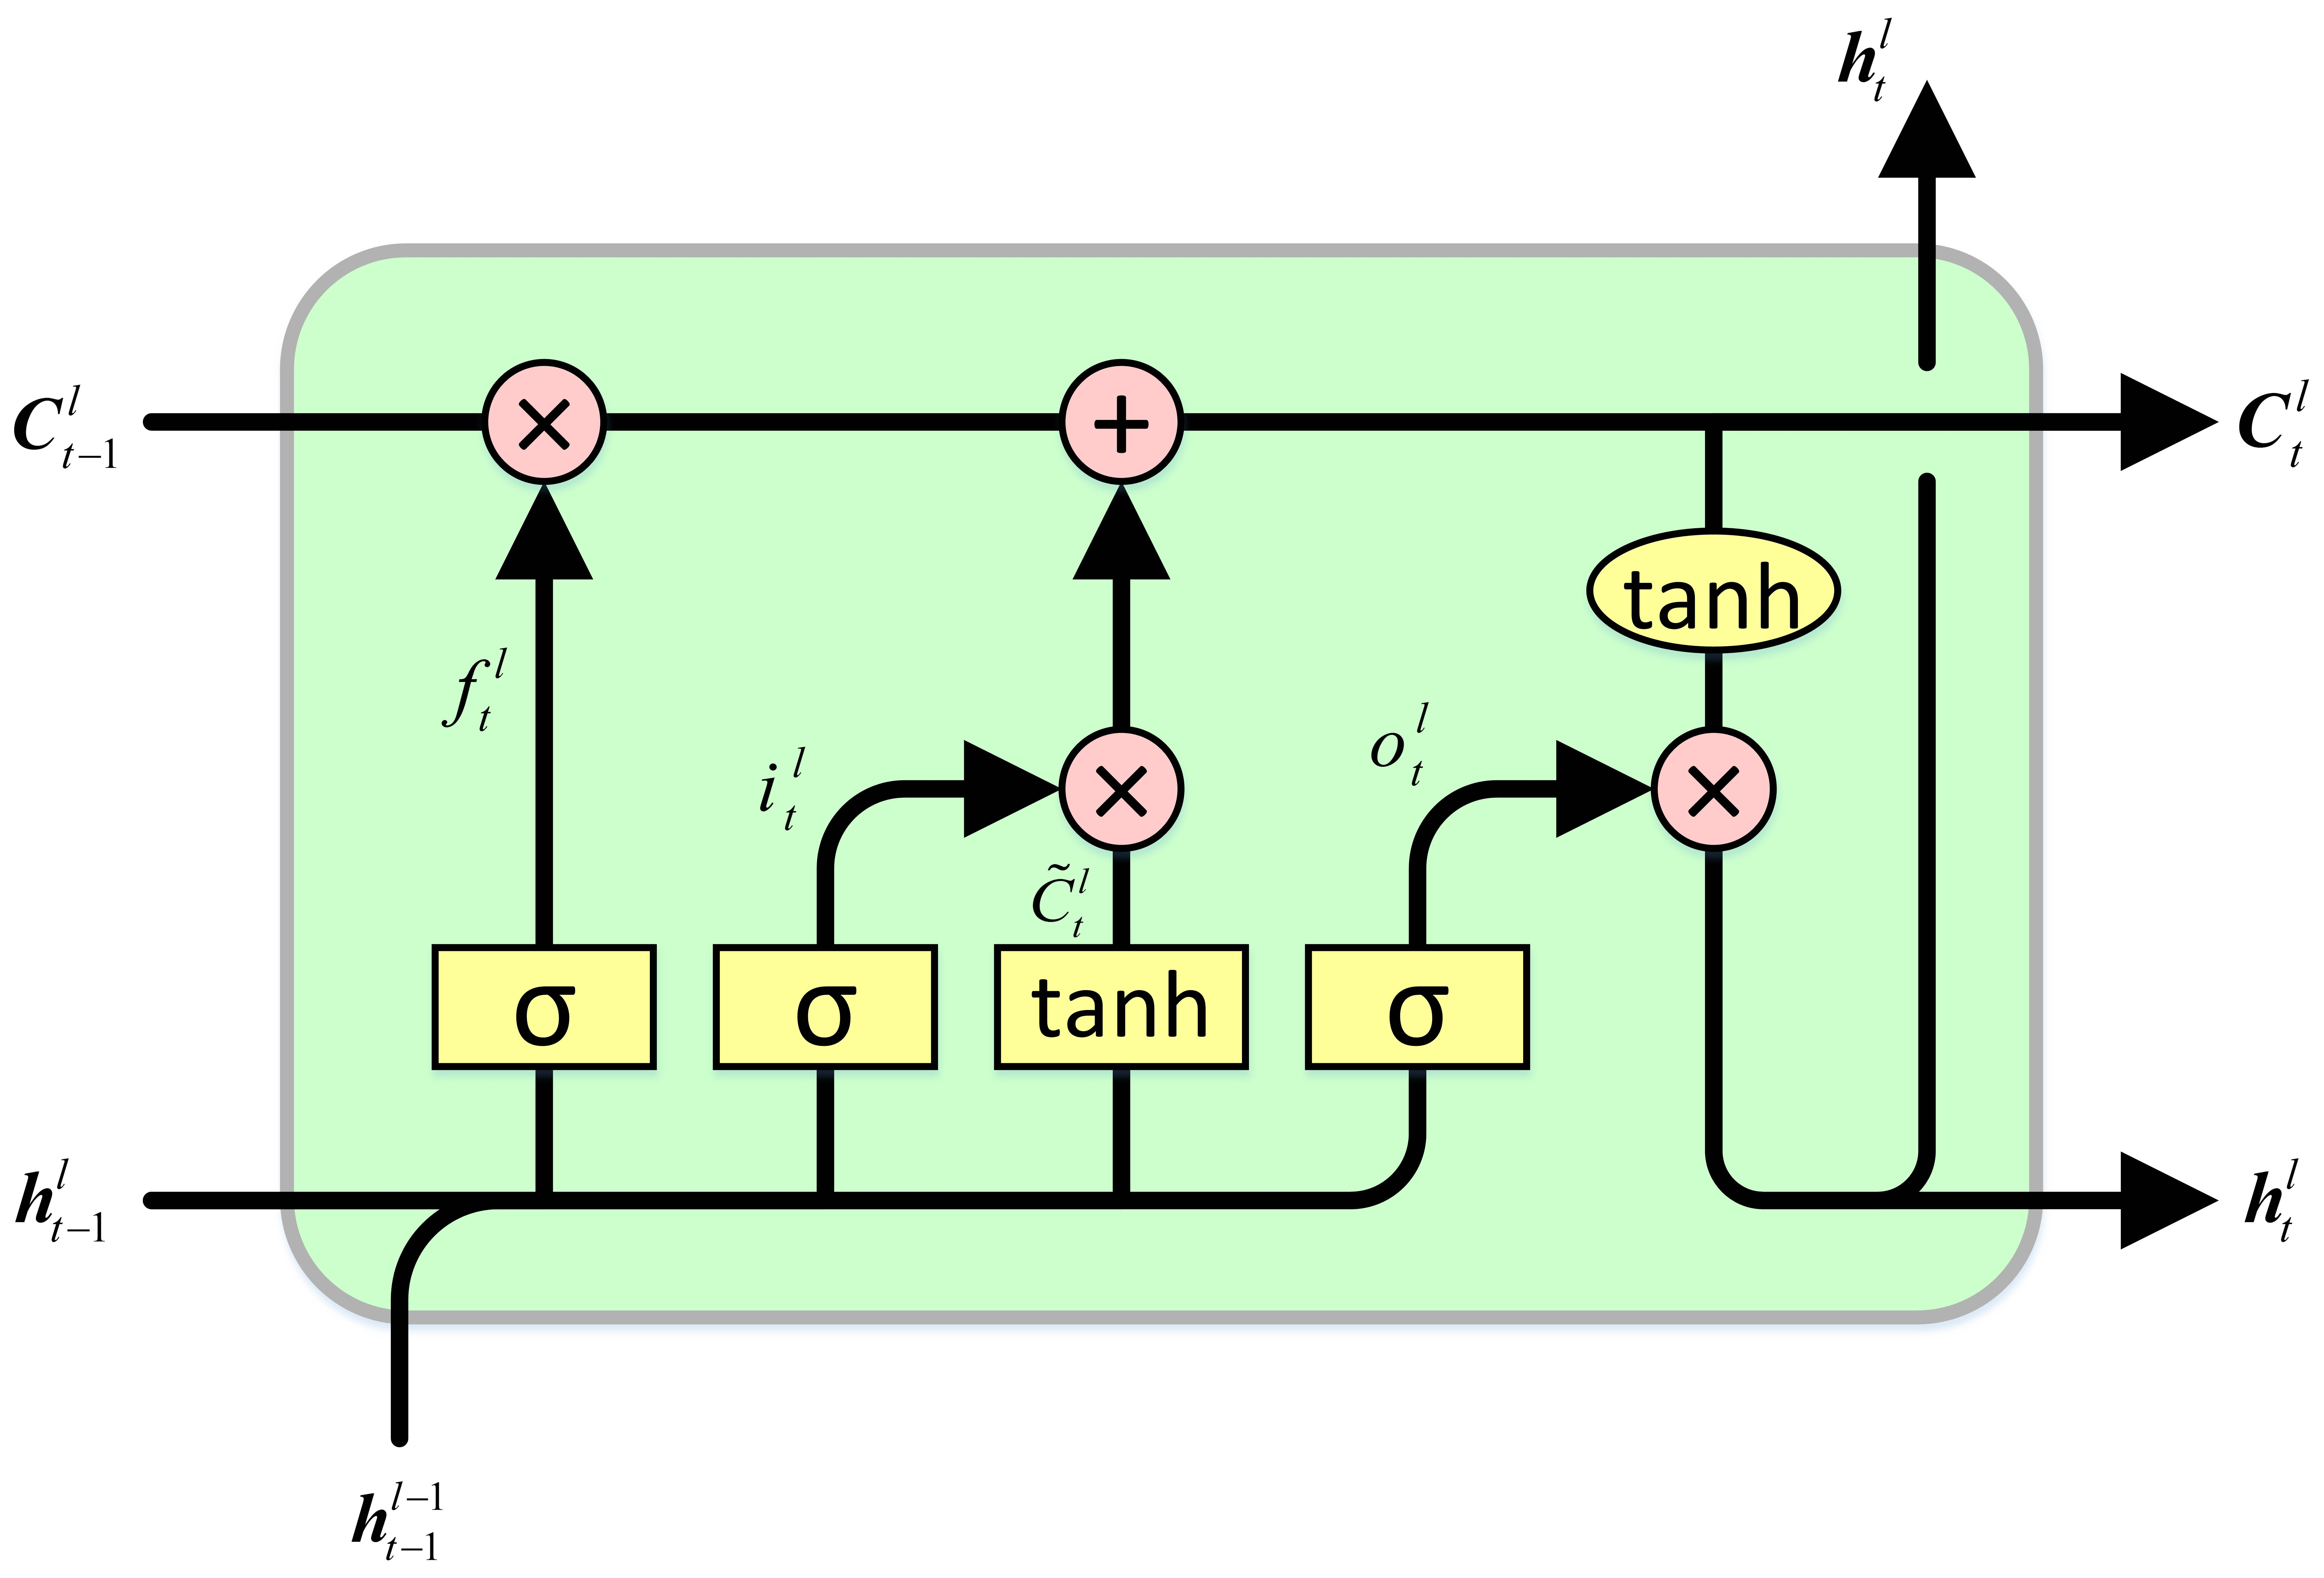

In [23]:
# Defining a basic LSTM layer
lstm = nn.LSTM(input_size=3, hidden_size=1, num_layers = 1, bias = True, batch_first=True)

In [24]:
lstm.state_dict()

OrderedDict([('weight_ih_l0',
              tensor([[-0.4250, -0.9270, -0.8195],
                      [-0.1409,  0.0351, -0.0048],
                      [-0.4442,  0.9184, -0.0415],
                      [ 0.7796, -0.8658, -0.8863]])),
             ('weight_hh_l0',
              tensor([[ 0.3409],
                      [ 0.5350],
                      [-0.5342],
                      [ 0.5318]])),
             ('bias_ih_l0', tensor([ 0.0055,  0.2840,  0.9242, -0.6743])),
             ('bias_hh_l0', tensor([0.2984, 0.5442, 0.0673, 0.3107]))])

In [25]:
out_all, out_last = lstm(seq)
print(f"Out all shape : {out_all.shape}")
print(f"Out last shape : {out_last[0].shape}")
out_all

Out all shape : torch.Size([1, 4, 1])
Out last shape : torch.Size([1, 1, 1])


tensor([[[0.0247],
         [0.0018],
         [0.0123],
         [0.0215]]], grad_fn=<TransposeBackward0>)

In [26]:
out_last

(tensor([[[0.0215]]], grad_fn=<StackBackward>),
 tensor([[[0.0418]]], grad_fn=<StackBackward>))

**out_last now includes cell state as one of the outputs**

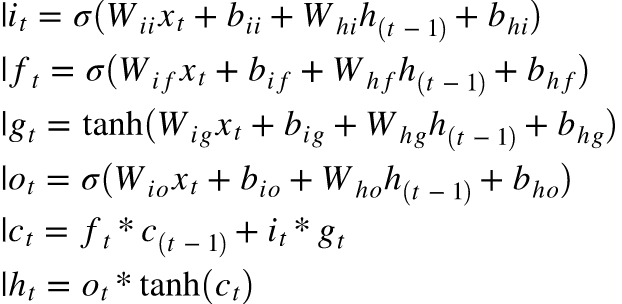

In [27]:
x = seq[0][0]
x

tensor([1., 1., 1.])

In [28]:
wii_10 = lstm.weight_ih_l0[0,:].squeeze(0)
wif_10 = lstm.weight_ih_l0[1,:].squeeze(0)
wig_10 = lstm.weight_ih_l0[2,:].squeeze(0)
wio_10 = lstm.weight_ih_l0[3,:].squeeze(0)

whi_10 = lstm.weight_hh_l0[0]
whf_10 = lstm.weight_hh_l0[1]
whg_10 = lstm.weight_hh_l0[2]
who_10 = lstm.weight_hh_l0[3]

bii_10 = lstm.bias_ih_l0[0]
bif_10 = lstm.bias_ih_l0[1]
big_10 = lstm.bias_ih_l0[2]
bio_10 = lstm.bias_ih_l0[3]

bhi_10 = lstm.bias_hh_l0[0]
bhf_10 = lstm.bias_hh_l0[1]
bhg_10 = lstm.bias_hh_l0[2]
bho_10 = lstm.bias_hh_l0[3]

In [29]:
h_previous = torch.Tensor([0.0])
c_previous = torch.Tensor([0.0])

i = torch.sigmoid(dot(x,wii_10) + bii_10  + dot(h_previous,whi_10) + bhi_10  )
f = torch.sigmoid(dot(x,wif_10) + bif_10  + dot(h_previous,whf_10) + bhf_10  )
g = torch.tanh(   dot(x,wig_10) + big_10  + dot(h_previous,whg_10) + bhg_10  )
o = torch.sigmoid(dot(x,wio_10) + bio_10  + dot(h_previous,who_10) + bho_10  )
c1 = f* c_previous + i*g
h1 = o* torch.tanh(c1)

h1

tensor([0.0247], grad_fn=<MulBackward0>)

In [30]:
x = seq[0][1]

h_previous = h1
c_previous = c1

i = torch.sigmoid(dot(x,wii_10) + bii_10  + dot(h_previous,whi_10) + bhi_10  )
f = torch.sigmoid(dot(x,wif_10) + bif_10  + dot(h_previous,whf_10) + bhf_10  )
g = torch.tanh(   dot(x,wig_10) + big_10  + dot(h_previous,whg_10) + bhg_10  )
o = torch.sigmoid(dot(x,wio_10) + bio_10  + dot(h_previous,who_10) + bho_10  )
c2 = f* c_previous + i*g
h2 = o* torch.tanh(c2)

h2

tensor([0.0018], grad_fn=<MulBackward0>)

# Pytroch sentiment analysis

#### Dataset : Sentiment140, 0 : Negative , 2 : Neutrual , 4 : Positive

- target: the polarity of the tweet (0 = negative, 2 = neutral, 4 = positive)
- ids: The id of the tweet ( 2087)
- date: the date of the tweet (Sat May 16 23:58:44 UTC 2009)
- flag: The query (lyx). If there is no query, then this value is NO_QUERY.
- user: the user that tweeted (robotickilldozr)
- text: the text of the tweet (Lyx is cool)

In [31]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import random
import math
import torch.nn as nn
import torch.optim as optim

In [32]:
dataset = pd.read_csv("training.1600000.processed.noemoticon.csv",engine = 'python', header = None) # avoid utf-8 error message by using engine = 'python'

In [33]:
dataset.head()

,0,1,2,3,4,5
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [34]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   0       1600000 non-null  int64 
 1   1       1600000 non-null  int64 
 2   2       1600000 non-null  object
 3   3       1600000 non-null  object
 4   4       1600000 non-null  object
 5   5       1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [35]:
dataset[0].value_counts()

0    800000
4    800000
Name: 0, dtype: int64

In [36]:
dataset["sentiment"] = dataset[0].replace(4,1)

In [37]:
dataset["sentiment"].value_counts()

0    800000
1    800000
Name: sentiment, dtype: int64

In [38]:
dataset

,0,1,2,3,4,5,sentiment
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,0
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,0
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,0
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",0
...,...,...,...,...,...,...,...
1599995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...,1
1599996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...,1
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...,1
1599998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...,1


In [39]:
tweet_df = dataset[[5,'sentiment']]

In [40]:
tweet_df.columns = ["tweet","label"]

In [41]:
tweet_df.to_csv("tweets_lstm.csv", index = None)

In [42]:
from torchtext.legacy import data

#### Create dataset

In [43]:
label = data.LabelField()
tweet = data.Field(tokenize = "spacy",lower = True)

In [44]:
fields = [("tweet",tweet),("label",label)]
twitterDataset = data.TabularDataset(
    path = 'tweets_lstm.csv',
    format = 'CSV',
    fields = fields,
    skip_header = True,
)

train,test,val = twitterDataset.split(split_ratio = [0.8,0.1,0.1])

In [45]:
len(train),len(test),len(val)

(1280000, 160000, 160000)

In [46]:
vars(train.examples[7])

{'tweet': ['@leahchu',
  '...',
  ' ',
  'then',
  'who',
  'are',
  'you',
  '?',
  'a',
  'ghost',
  '?'],
 'label': '0'}

In [47]:
vocab_size = 20000
tweet.build_vocab(train,max_size = vocab_size)
label.build_vocab(train)

LSTM expects an input that is **one-hot encoded** meaning that each character is converted into an integer (via our created dictionary) and then converted into a column vector where only it's corresponding integer index will have the value of 1 and the rest of the vector will be filled with 0's. _so Pytorch will do this for me??_

In [48]:
len(tweet.vocab)

20002

**the extra "2" comes from \<unk> : unknown words and \<pad> : pad the text to ensure input that has the same length**

In [49]:
tweet.vocab.freqs.most_common(10)

[('i', 798512),
 ('!', 723927),
 ('.', 646908),
 (' ', 470182),
 ('to', 452597),
 ('the', 417362),
 (',', 386251),
 ('a', 303974),
 ('my', 253334),
 ('it', 242519)]

In [50]:
tweet.vocab.itos[:10] # index -> word

['<unk>', '<pad>', 'i', '!', '.', ' ', 'to', 'the', ',', 'a']

#### Create dataloader

In [51]:
train_iterator, valid_iterator, test_iterator = data.BucketIterator.splits((train, val, test),batch_size = 32)

#### Build LSTM model
ref 1 : https://learning.oreilly.com/library/view/programming-pytorch-for/9781492045342/ch05.html#creating-our-model

ref 2 : https://github.com/udacity/deep-learning-v2-pytorch/blob/master/recurrent-neural-networks/char-rnn/Character_Level_RNN_Solution.ipynb

In [52]:
import torch.nn as nn
import torch

class simple_LSTM(nn.Module):
    def __init__(self, hidden_size, embedding_dim, vocab_size):
        super(simple_LSTM, self).__init__()

        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.encoder = nn.LSTM(input_size=embedding_dim,
                hidden_size=hidden_size, num_layers=1)
        self.predictor = nn.Linear(hidden_size, 2) # output 2 classes

    def forward(self, seq):
        output, (hidden,_) = self.encoder(self.embedding(seq))
        preds = self.predictor(hidden.squeeze(0))
        return preds

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = simple_LSTM(100,300, 20002)
model.to(device)

simple_LSTM(
  (embedding): Embedding(20002, 300)
  (encoder): LSTM(300, 100)
  (predictor): Linear(in_features=100, out_features=2, bias=True)
)

> The shape of lstm_out is (seq_len, batch_size, hidden_dim) and the shape of h is (num_layers*num_directions, batch_size, hidden_dim), refer to https://github.com/chrisvdweth/ml-toolkit/blob/master/pytorch/notebooks/minimal-example-lstm-input.ipynb

In [53]:
optimizer = optim.Adam(model.parameters(), lr=2e-2)
criterion = nn.CrossEntropyLoss()

def train(epochs, model, optimizer, criterion, train_iterator, valid_iterator):
    for epoch in range(1, epochs+1):
     
        training_loss = 0.0
        valid_loss = 0.0
        model.train()
        for batch_idx, batch in enumerate(train_iterator):
            optimizer.zero_grad()
            predict = model(batch.tweet)
            loss = criterion(predict,batch.label)
            loss.backward()
            optimizer.step()
            training_loss += loss.data.item() * batch.tweet.size(0)
        training_loss /= len(train_iterator)
 
        
        model.eval()
        for batch_idx,batch in enumerate(valid_iterator):
            predict = model(batch.tweet)
            loss = criterion(predict,batch.label)
            valid_loss += loss.data.item() * batch.tweet.size(0)
 
        valid_loss /= len(valid_iterator)
        print('Epoch: {}, Training Loss: {:.2f}, Validation Loss: {:.2f}'.format(epoch, training_loss, valid_loss))

In [54]:
#train(5, model, optimizer, criterion, train_iterator, valid_iterator)

In [55]:
label.vocab.itos

['1', '0']

In [56]:
def one_hot_encode(arr, n_labels):
    
    # Initialize the the encoded array
    one_hot = np.zeros((arr.size, n_labels), dtype=np.float32)
    
    # Fill the appropriate elements with ones
    one_hot[np.arange(one_hot.shape[0]), arr.flatten()] = 1.
    
    # Finally reshape it to get back to the original array
    one_hot = one_hot.reshape((*arr.shape, n_labels))
    
    return one_hot


In [57]:
test_seq = np.array([[3, 5, 1]])
one_hot = one_hot_encode(test_seq, 8)

print(one_hot)

[[[0. 0. 0. 1. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 1. 0. 0.]
  [0. 1. 0. 0. 0. 0. 0. 0.]]]


In [58]:
ls_test = [65, 12, 19, 35, 59, 47, 80, 21,  8, 24, 24, 24, 32, 19, 35, 35, 45,
       21, 46, 19, 72,  0, 25,  0, 47, 23, 21, 19, 80, 47, 21, 19, 25, 25,
       21, 19, 25,  0, 76, 47, 50, 21, 47, 56, 47, 80, 45, 21, 44,  2, 12,
       19, 35, 35, 45, 21, 46, 19, 72,  0, 25, 45, 21,  0, 23, 21, 44,  2,
       12, 19, 35, 35, 45, 21,  0,  2, 21,  0, 59, 23, 21, 81, 14,  2, 24,
       14, 19, 45,  9, 24, 24, 61, 56, 47, 80, 45, 59, 12,  0,  2]

In [59]:
def get_batches(arr, batch_size, seq_length):
    '''Create a generator that returns batches of size
       batch_size x seq_length from arr.
       
       Arguments
       ---------
       arr: Array you want to make batches from
       batch_size: Batch size, the number of sequences per batch
       seq_length: Number of encoded chars in a sequence
    '''
    
    batch_size_total = batch_size * seq_length
    # total number of batches we can make
    n_batches = len(arr)//batch_size_total
    
    # Keep only enough characters to make full batches
    arr = arr[:n_batches * batch_size_total]
    # Reshape into batch_size rows
    arr = arr.reshape((batch_size, -1))
    
    # iterate through the array, one sequence at a time
    for n in range(0, arr.shape[1], seq_length):
        # The features
        x = arr[:, n:n+seq_length]
        # The targets, shifted by one
        y = np.zeros_like(x)
        try:
            y[:, :-1], y[:, -1] = x[:, 1:], arr[:, n+seq_length]
        except IndexError:
            y[:, :-1], y[:, -1] = x[:, 1:], arr[:, 0]
        yield x, y

In [60]:
ts_array = np.array(ls_test)

In [61]:
ts_array

array([65, 12, 19, 35, 59, 47, 80, 21,  8, 24, 24, 24, 32, 19, 35, 35, 45,
       21, 46, 19, 72,  0, 25,  0, 47, 23, 21, 19, 80, 47, 21, 19, 25, 25,
       21, 19, 25,  0, 76, 47, 50, 21, 47, 56, 47, 80, 45, 21, 44,  2, 12,
       19, 35, 35, 45, 21, 46, 19, 72,  0, 25, 45, 21,  0, 23, 21, 44,  2,
       12, 19, 35, 35, 45, 21,  0,  2, 21,  0, 59, 23, 21, 81, 14,  2, 24,
       14, 19, 45,  9, 24, 24, 61, 56, 47, 80, 45, 59, 12,  0,  2])

In [62]:
batch_size = 6
seq_length = 5
arr = ts_array.copy()
batch_size_total = batch_size * seq_length
# total number of batches we can make
n_batches = len(arr)//batch_size_total
    
# Keep only enough characters to make full batches
arr = arr[:n_batches * batch_size_total]
# Reshape into batch_size rows
arr = arr.reshape((batch_size, -1))

In [63]:
arr

array([[65, 12, 19, 35, 59, 47, 80, 21,  8, 24, 24, 24, 32, 19, 35],
       [35, 45, 21, 46, 19, 72,  0, 25,  0, 47, 23, 21, 19, 80, 47],
       [21, 19, 25, 25, 21, 19, 25,  0, 76, 47, 50, 21, 47, 56, 47],
       [80, 45, 21, 44,  2, 12, 19, 35, 35, 45, 21, 46, 19, 72,  0],
       [25, 45, 21,  0, 23, 21, 44,  2, 12, 19, 35, 35, 45, 21,  0],
       [ 2, 21,  0, 59, 23, 21, 81, 14,  2, 24, 14, 19, 45,  9, 24]])

In [64]:
n_batches

3

In [65]:
 # iterate through the array, one sequence at a time
for n in range(0, arr.shape[1], seq_length):
    # The features
    x = arr[:, n:n+seq_length]
    # The targets, shifted by one
    y = np.zeros_like(x)
    try:
        y[:, :-1], y[:, -1] = x[:, 1:], arr[:, n+seq_length]
    except IndexError:
        y[:, :-1], y[:, -1] = x[:, 1:], arr[:, 0]
    print (x,'\n','*'*50, '\n', y,'\n','*'*50)

[[65 12 19 35 59]
 [35 45 21 46 19]
 [21 19 25 25 21]
 [80 45 21 44  2]
 [25 45 21  0 23]
 [ 2 21  0 59 23]] 
 ************************************************** 
 [[12 19 35 59 47]
 [45 21 46 19 72]
 [19 25 25 21 19]
 [45 21 44  2 12]
 [45 21  0 23 21]
 [21  0 59 23 21]] 
 **************************************************
[[47 80 21  8 24]
 [72  0 25  0 47]
 [19 25  0 76 47]
 [12 19 35 35 45]
 [21 44  2 12 19]
 [21 81 14  2 24]] 
 ************************************************** 
 [[80 21  8 24 24]
 [ 0 25  0 47 23]
 [25  0 76 47 50]
 [19 35 35 45 21]
 [44  2 12 19 35]
 [81 14  2 24 14]] 
 **************************************************
[[24 24 32 19 35]
 [23 21 19 80 47]
 [50 21 47 56 47]
 [21 46 19 72  0]
 [35 35 45 21  0]
 [14 19 45  9 24]] 
 ************************************************** 
 [[24 32 19 35 65]
 [21 19 80 47 35]
 [21 47 56 47 21]
 [46 19 72  0 80]
 [35 45 21  0 25]
 [19 45  9 24  2]] 
 **************************************************


## Fake News Classifier Using LSTM

In [1]:
import pandas as pd
df = pd.read_csv('fake_news/train.csv')
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [2]:
df = df.dropna()

In [3]:
X = df.drop("label",axis = 1)

In [4]:
y = df['label']

In [5]:
import tensorflow as tf
tf.__version__

'2.7.0'

In [6]:
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.layers import Dropout

In [7]:
voc_size = 5000

In [8]:
messages = X.copy()
messages.reset_index(inplace=True,drop = True)
messages

,id,title,author,text
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ..."
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...
...,...,...,...,...
18280,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...
18281,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...
18282,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...
18283,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal..."


In [9]:
import nltk
import re
from nltk.corpus import stopwords

In [10]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /Users/pan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

### Dataset Preprocessing

In [11]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
corpus = []
for i in range(0, len(messages)):
    review = re.sub('[^a-zA-Z]', ' ', messages['title'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [12]:
corpus[0]

'hous dem aid even see comey letter jason chaffetz tweet'

In [13]:
messages['title'][0]

'House Dem Aide: We Didn’t Even See Comey’s Letter Until Jason Chaffetz Tweeted It'

### One-hot encoding

In [14]:
onehot_repr=[one_hot(words,voc_size)for words in corpus] 
onehot_repr[0]

[2866, 2567, 1646, 2353, 4018, 4400, 4438, 1911, 2630, 2212]

### Padding

In [15]:
sent_length=20
embedded_docs=pad_sequences(onehot_repr,padding='pre',maxlen=sent_length)
print(embedded_docs)

[[   0    0    0 ... 1911 2630 2212]
 [   0    0    0 ...  510 4510 2504]
 [   0    0    0 ... 1424  668 4614]
 ...
 [   0    0    0 ... 1848 1360  889]
 [   0    0    0 ... 3137 4562 3658]
 [   0    0    0 ... 4788 3163 2865]]


### Build model
ref: https://zhuanlan.zhihu.com/p/58854907 on what the dimensionality of the output space in Tensorflow is

In [21]:
embedding_vector_features=40
model=Sequential()
model.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
model.add(LSTM(100))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 20, 40)            200000    
                                                                 
 lstm_1 (LSTM)               (None, 100)               56400     
                                                                 
 dense_1 (Dense)             (None, 1)                 101       
                                                                 
Total params: 256,501
Trainable params: 256,501
Non-trainable params: 0
_________________________________________________________________
None


In [22]:
import numpy as np
from sklearn.model_selection import train_test_split
X_final=np.array(embedded_docs)
y_final=np.array(y)
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.33, random_state=42)

In [23]:
X_final.shape,y_final.shape

((18285, 20), (18285,))

### Training model

In [24]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=64)

Epoch 1/10
192/192 [==============================] - 5s 17ms/step - loss: 0.3396 - accuracy: 0.8370 - val_loss: 0.2041 - val_accuracy: 0.9140
Epoch 2/10
192/192 [==============================] - 3s 15ms/step - loss: 0.1372 - accuracy: 0.9447 - val_loss: 0.1963 - val_accuracy: 0.9233
Epoch 3/10
192/192 [==============================] - 3s 15ms/step - loss: 0.0948 - accuracy: 0.9669 - val_loss: 0.2292 - val_accuracy: 0.9205
Epoch 4/10
192/192 [==============================] - 3s 15ms/step - loss: 0.0679 - accuracy: 0.9780 - val_loss: 0.3005 - val_accuracy: 0.9085
Epoch 5/10
192/192 [==============================] - 3s 16ms/step - loss: 0.0517 - accuracy: 0.9829 - val_loss: 0.3471 - val_accuracy: 0.9044
Epoch 6/10
192/192 [==============================] - 3s 15ms/step - loss: 0.0357 - accuracy: 0.9888 - val_loss: 0.3311 - val_accuracy: 0.9092
Epoch 7/10
192/192 [==============================] - 3s 14ms/step - loss: 0.0230 - accuracy: 0.9935 - val_loss: 0.4905 - val_accuracy: 0.9133

In [47]:
ypred = (model.predict(X_test) > 0.5).astype("int32").squeeze()

In [49]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,ypred)

array([[3122,  297],
       [ 237, 2379]])

In [54]:
# """
#             predicted                        
#             0       1     
#           -----   -----    
#        0|   3122   |   297      
# actual    -----   -----             
#        1|   237   |   2379  
       
# """


# TN (True Negative) = cm[0][0] = 3122
# FN (False Negative) = cm[1][0] = 237
# TP (True Positive) = cm[1][1] = 2379
# FP (False Positive) = cm[0][1] = 297

In [56]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,ypred)

0.9115161557580779